# This notebook compares the V15 and V20 prediction errors for different bitstrings/categories

### Load the data

In [2]:
import pandas as pd
df = pd.read_pickle('tmp_data/clean_yearly_data.pkl')

### Create a plotting function

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig,ncircles):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude_ERA']
    y = df['longitude_ERA']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta_{\rm V20}$ (K)',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.
    ax.scatter(-180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.

    #ax.scatter(180,0,c='k')

    #ax.set_xlim(-180,180)
    
    
    
    
    
    #Extra circles
    row = df.sort_values(by=['delta'],ascending=False).iloc[0:ncircles]
    xsel = row['latitude_ERA']
    ysel = row['longitude_ERA']
    
    sc_extra = ax.scatter(ysel,xsel,transform=ccrs.PlateCarree(),
                          s=200, facecolors='none', edgecolors='C2',lw=2
                          )

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    

## Lake

latitude_ERA  longitude_ERA     delta
71526      24.028095       69.00000  4.772028
56014      13.348942       14.34375  2.341390
108838     45.386399       52.50000  1.852984
38367      -2.388758       36.00000  1.700690
25724     -13.629972     -172.40625  1.360054
109925     45.948460       59.25000  1.290954
109924     45.948460       58.87500  1.287730

-0.39684436

1650

/home/k/kimpson/miniconda3/envs/analysis/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


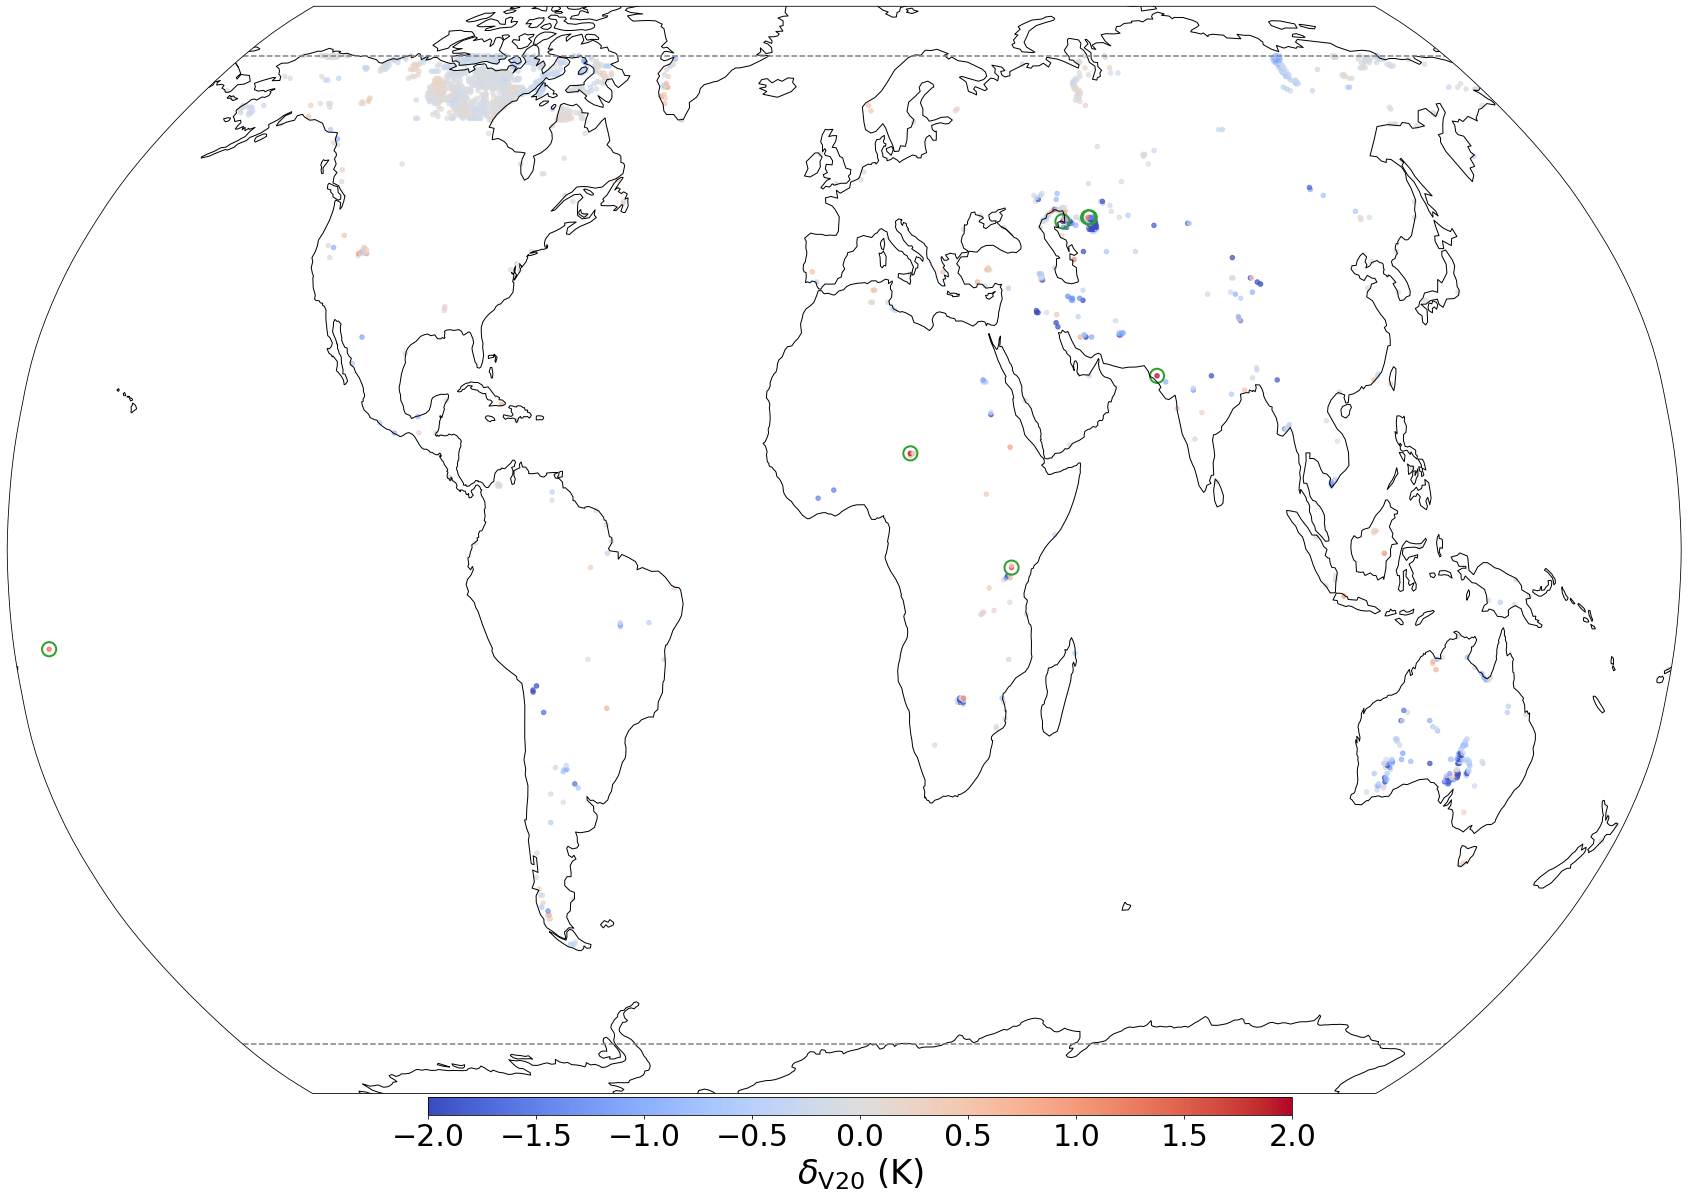

In [4]:
df_lake = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant')

n = 7
RobinsonPlot(df_lake,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_lake.delta.mean())
display(len(df_lake))

latitude_ERA  longitude_ERA     delta
71526      24.028095       69.00000  4.772028
56014      13.348942       14.34375  2.341390
108838     45.386399       52.50000  1.852984
109925     45.948460       59.25000  1.290954
109924     45.948460       58.87500  1.287730
18330     -20.374701       26.15625  1.180367
99344      40.046824       53.64000  1.131035

-0.8361866

546

latitude_ERA                      24.028095
longitude_ERA                          69.0
MODIS_LST                        313.741486
V15_prediction                   310.181458
V20_prediction                   304.213318
V20X_prediction                  305.191589
V15_error                          4.841587
V20_error                          9.613615
V20X_error                         8.781747
delta                              4.772028
deltaX                              3.94016
V15_clFr                            0.59056
V15_cvhFr                               0.0
V15_cvlFr                               0.0
V15_dl                             2.580078
V15_oceanFr                             0.0
V15_si10Fr                              0.0
V15_z                             23.542847
V20_clFr                           0.711941
V20_cvhFr                               0.0
V20_cvlFr                               0.0
V20_dl                             3.755859
V20_oceanFr                     

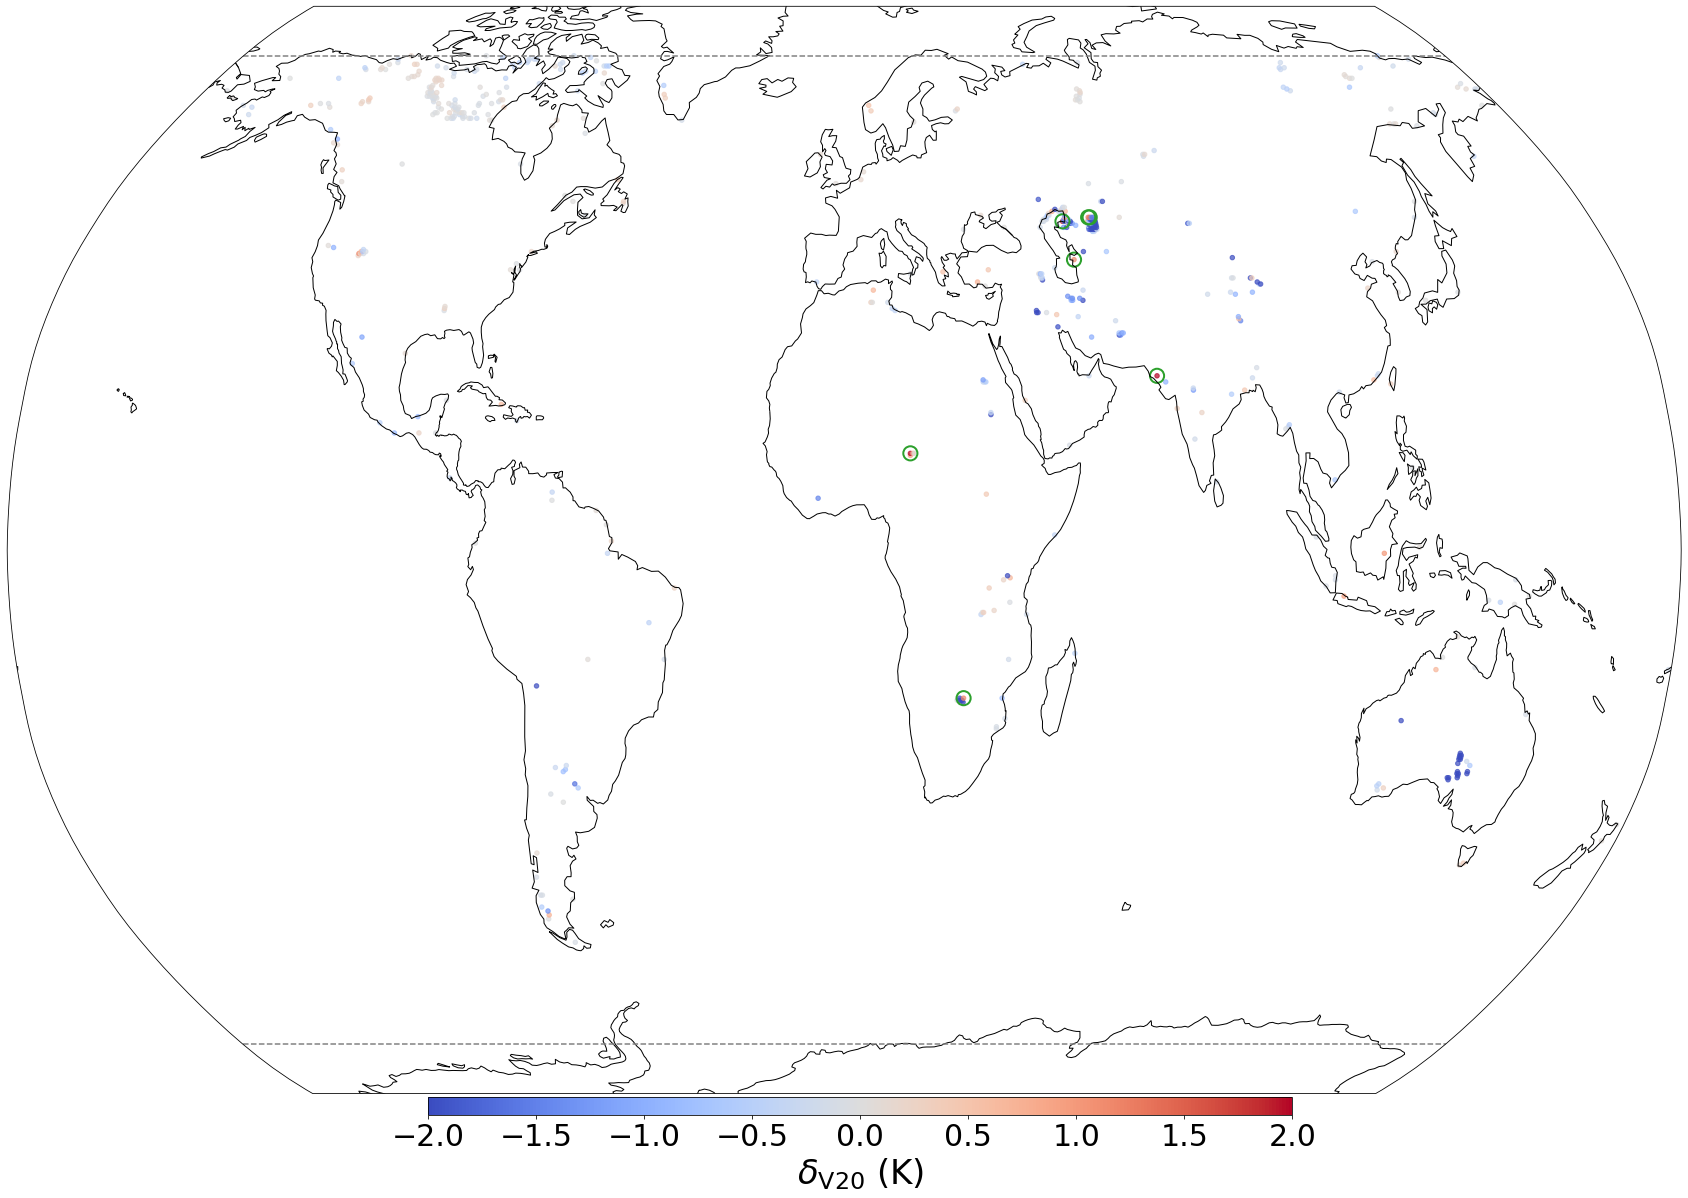

In [5]:
df_lake2 = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant')

n = 7
RobinsonPlot(df_lake2,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_lake2.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_lake2.delta.mean())
display(len(df_lake2))
display(df_lake2.sort_values(by=['delta'],ascending=False).iloc[0]) #[['latitude_ERA','longitude_ERA','delta']])


## Vegetation

0.2567885

58

latitude_ERA                      38.079612
longitude_ERA                    139.333333
MODIS_LST                        292.736389
V15_prediction                   292.219971
V20_prediction                   288.214935
V20X_prediction                  293.860931
V15_error                          2.951033
V20_error                           5.20378
V20X_error                         2.956962
delta                              2.252747
deltaX                             0.005929
V15_clFr                                0.0
V15_cvhFr                          0.183642
V15_cvlFr                          0.153855
V15_dl                                 25.0
V15_oceanFr                        0.489603
V15_si10Fr                              0.0
V15_z                            241.179565
V20_clFr                           0.003057
V20_cvhFr                               0.0
V20_cvlFr                               0.0
V20_dl                             33.27832
V20_oceanFr                     

38.079611613981385

139.33333333333337

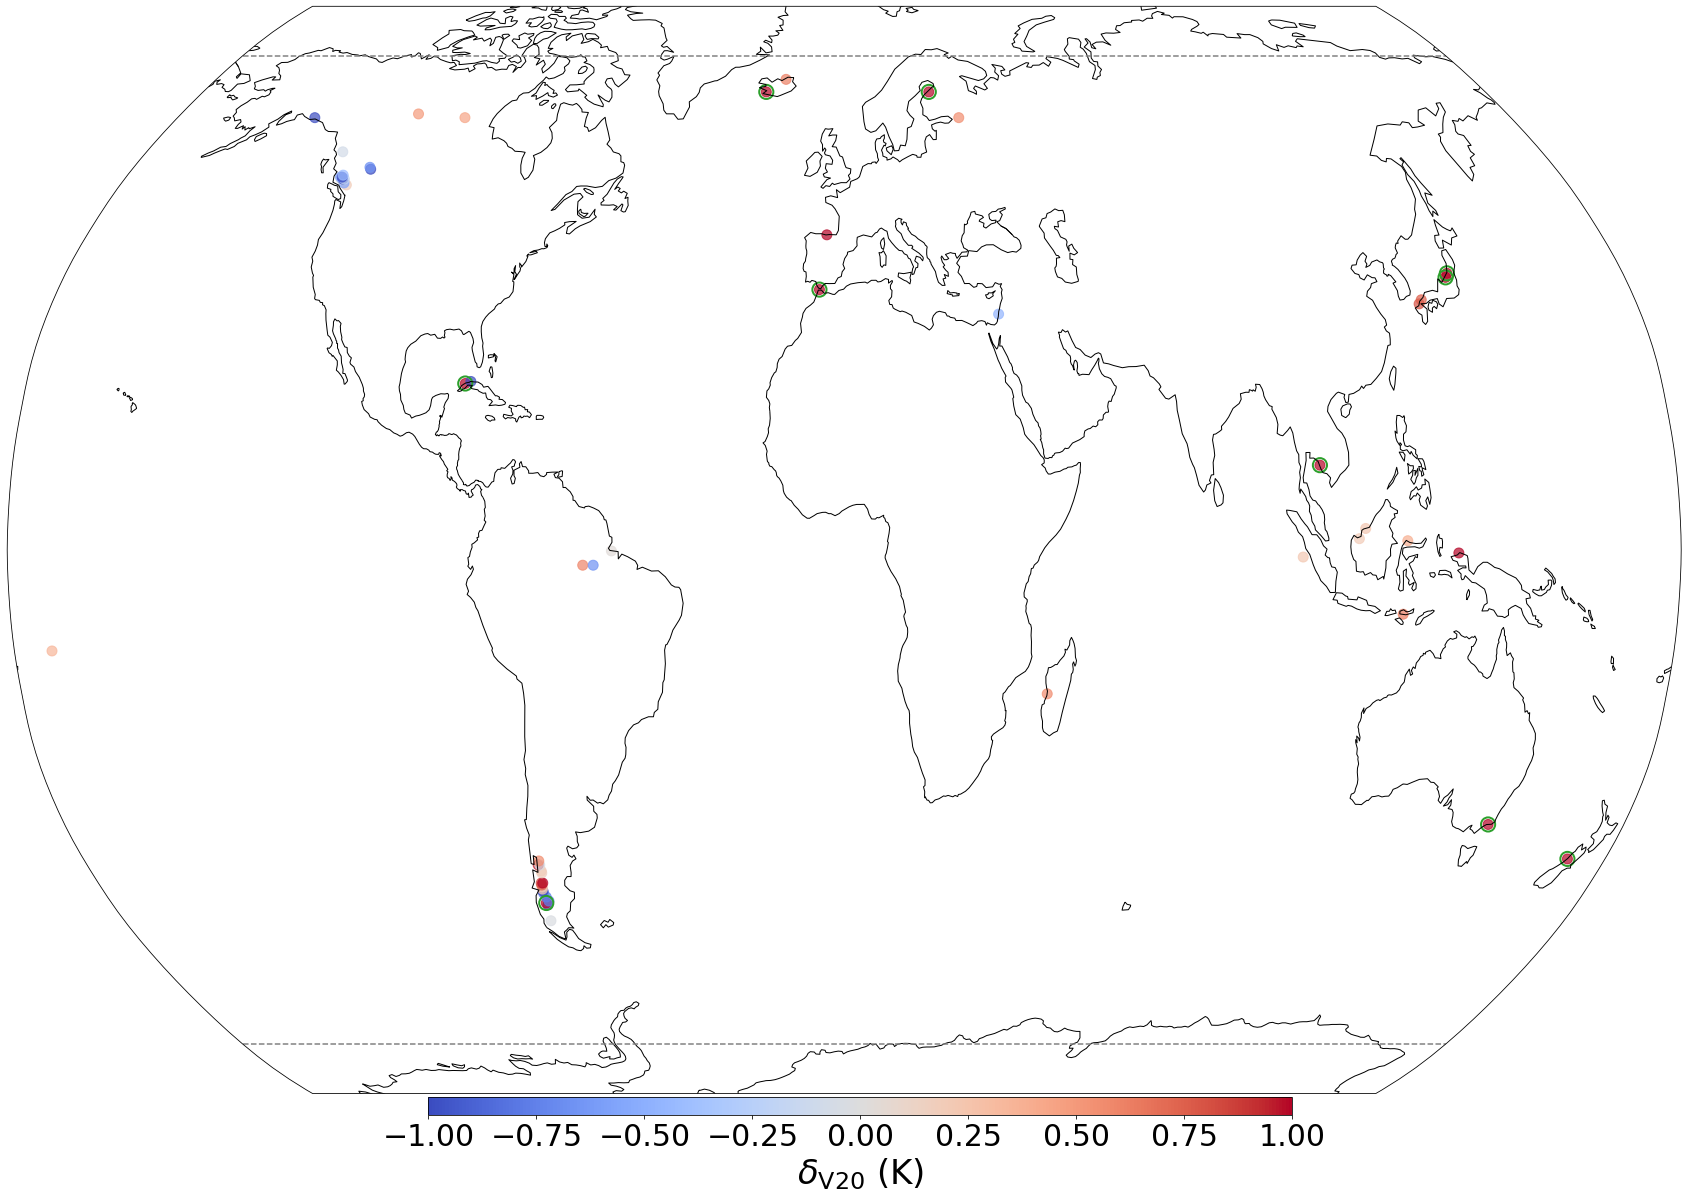

In [6]:
df_veg = df.query('cvhFr_change_is_significant & not clFr_change_is_significant')

n = 5
RobinsonPlot(df_veg,'delta',vmin=-1,vmax=+1,cmap=plt.cm.coolwarm,markersize = 100,savefig=None,ncircles=10)
row = df_veg.sort_values(by=['delta'],ascending=False).iloc[0]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])
display(df_veg.delta.mean())
display(len(df_veg))
display(row)
display(row.latitude_ERA)
display(row.longitude_ERA)


In [7]:
df_veg['change_in_cvh'] = df_veg['V15_cvhFr'] - df_veg['V20_cvhFr']

<ipython-input-7-1ca65b94fd37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_veg['change_in_cvh'] = df_veg['V15_cvhFr'] - df_veg['V20_cvhFr']


In [8]:
row = df_veg.query(' 60.90> latitude_ERA > 60.70 & delta > 0')#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr','change_in_cvh']]
row.iloc[0]#[['latitude_ERA','longitude_ERA','delta','V15_cvhFr','V20_cvhFr']])
display(row.latitude_ERA)
display(row.longitude_ERA)

135352    60.84306
Name: latitude_ERA, dtype: float64

135352   -115.555556
Name: longitude_ERA, dtype: float64

## Ice

-0.14363533

1057

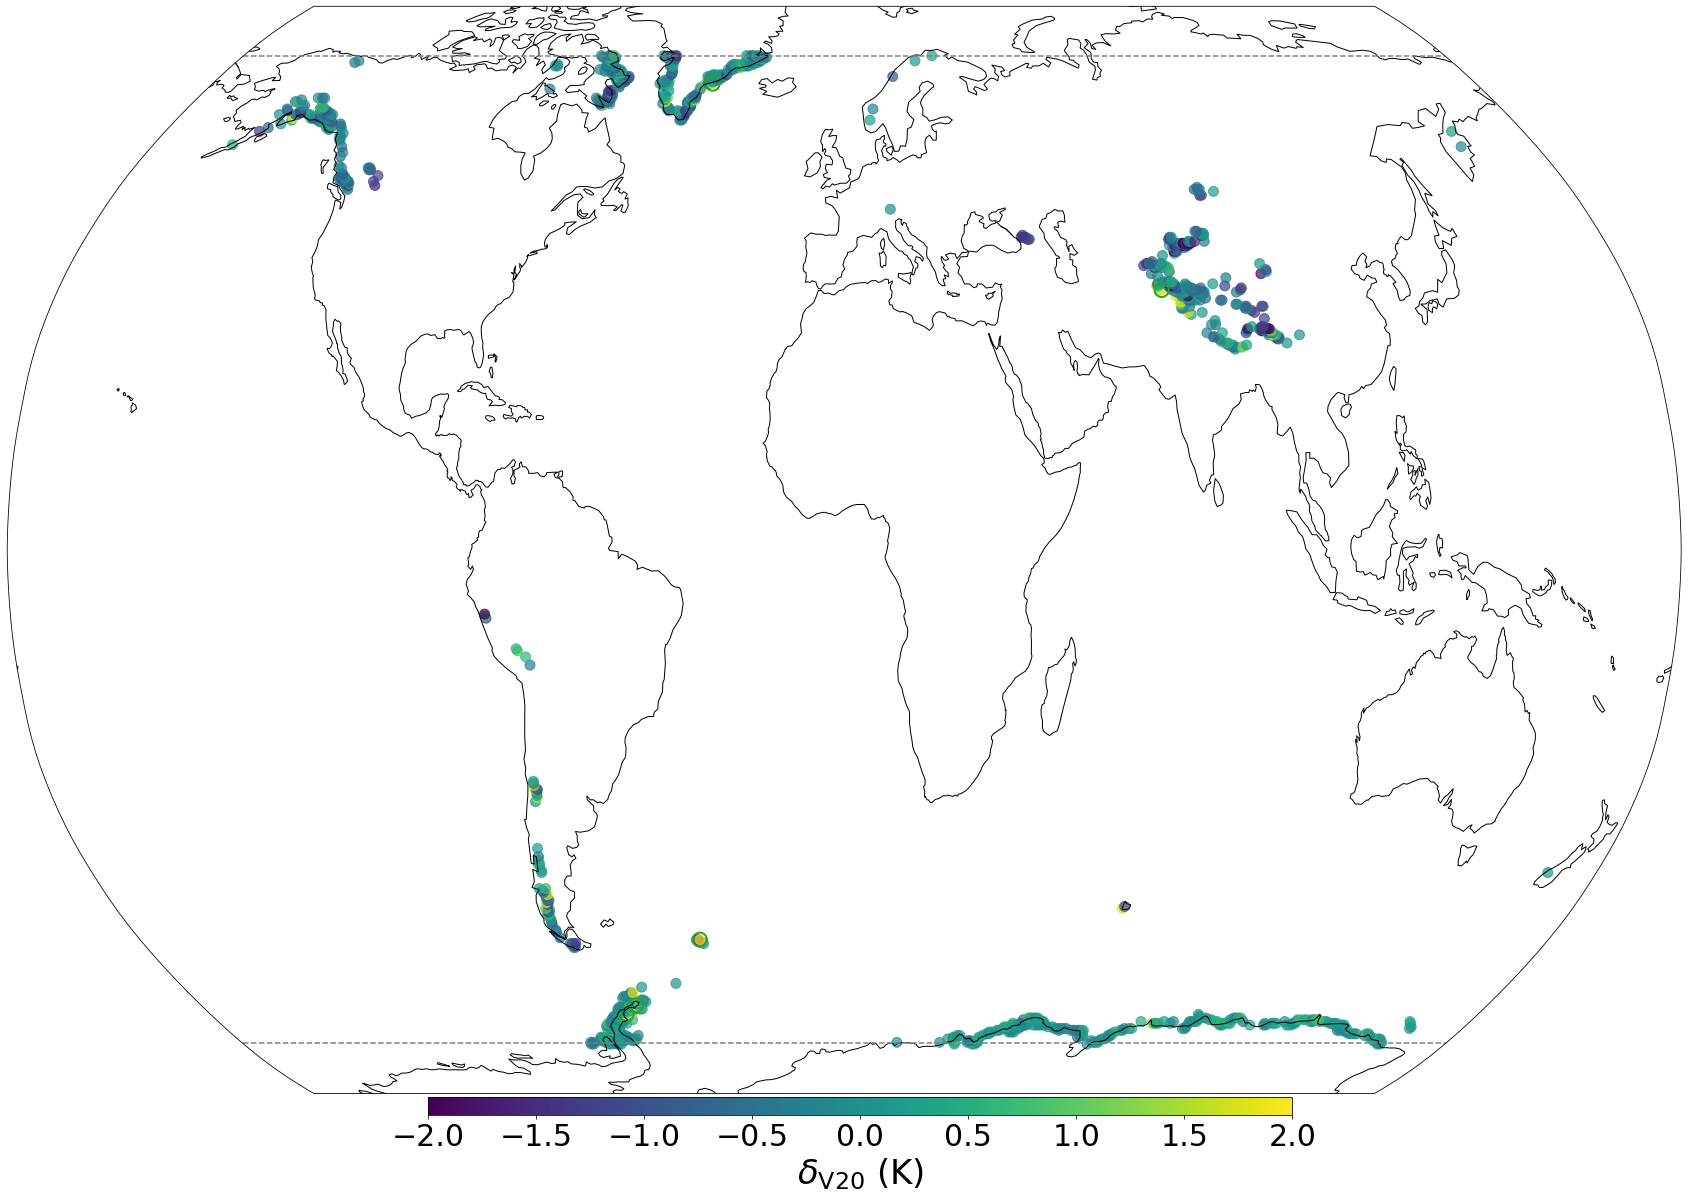

In [9]:
df_ice = df.query('si10Fr_change_is_significant ')
n = 5
RobinsonPlot(df_ice,'delta',vmin=-2,vmax=+2,cmap=plt.cm.viridis,markersize = 100,savefig=None,ncircles=n)
#display(df_ice.sort_values(by=['delta'],ascending=False).iloc[3])#[['latitude_ERA','longitude_ERA','delta','V15_si10Fr','V20_si10Fr','V15_oceanFr','V20_oceanFr','V15_clFr','V20_clFr']])
display(df_ice.delta.mean())
display(len(df_ice))



## Deepdive

Now lets look at some particular points


## Deepdive - Lake bad points


In [21]:
#0 = Brazil 1, south
#1 = Brazil 2, north
#2 = Gujarat
#3 = SLC
#4 = Chott Melrhir
#5 = Australia
#6 = Lake Natron



#NEW DATA


# 2 = Caspian Sea
# 3 = Lake Natron
# 4 = Samoa - very weird this one. Why would it get worse?!
# 5 = Aral Sea

n=3
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[n]) #[['latitude_ERA','longitude_ERA','delta']])


latitude_ERA                       -2.388758
longitude_ERA                           36.0
MODIS_LST                         317.764832
V15_prediction                    316.040344
V20_prediction                    312.748413
V20X_prediction                    315.54364
V15_error                           4.103479
V20_error                            5.80417
V20X_error                          4.455614
delta                                1.70069
deltaX                              0.352134
V15_clFr                            0.040797
V15_cvhFr                           0.034366
V15_cvlFr                           0.426142
V15_dl                                   6.0
V15_oceanFr                              0.0
V15_si10Fr                               0.0
V15_z                            6079.191406
V20_clFr                            0.378799
V20_cvhFr                           0.022256
V20_cvlFr                           0.275984
V20_dl                                   3.0
V20_oceanF

In [23]:
display(df_lake.sort_values(by=['delta'],ascending=False).head(20)) #[['latitude_ERA','longitude_ERA','delta']])


latitude_ERA  longitude_ERA   MODIS_LST  V15_prediction  \
71526      24.028095       69.00000  313.741486      310.181458   
56014      13.348942       14.34375  306.201447      313.434998   
108838     45.386399       52.50000  296.038452      294.063812   
38367      -2.388758       36.00000  317.764832      316.040344   
25724     -13.629972     -172.40625  297.877197      298.794098   
109925     45.948460       59.25000  298.968719      296.000549   
109924     45.948460       58.87500  298.037598      294.546295   
18330     -20.374701       26.15625  313.511139      313.739288   
99344      40.046824       53.64000  310.667175      307.422638   
100570     40.889915     -113.76000  298.036804      301.219574   
40784      -0.421546      116.15625  302.922028      302.244019   
109909     45.948460       53.25000  301.839325      299.871460   
33641      -6.323183      107.71875  305.771515      307.266022   
100575     40.889915     -111.96000  294.543030      296.551575   
142333     65.058510      -50.00000  268.620483      268.637634   
140009     63.653361      -51.00000  271.556671      273.281464   
57099      14.192033       36.00000  317.893311      318.536194   
55693      13.067912       14.34375  300.874603      303.284058   
111535     46.791551       53.20000  300.107056      297.908142   
80712      29.367672       52.81250  306.732483      307.192200   

        V20_prediction  V20X_prediction  V15_error  V20_error  V20X_error  \
71526       304.213318       305.191589   4.841587   9.613615    8.781747   
56014       315.835754       315.003754   7.305827   9.647217    8.821376   
108838      291.038849       294.448883   3.755077   5.608061    3.649691   
38367       312.748413       315.543640   4.103479   5.804170    4.455614   
25724       301.475220       298.855499   2.407228   3.767281    2.310044   
109925      294.716461       295.490112   3.719639   5.010593    4.437171   
109924      293.467316       293.764832   4.181702   5.469432    5.235558   
18330       309.833313       310.193085   3.179955   4.360323    4.033074   
99344       305.902069       307.752258   3.953727   5.084762    3.658677   
100570      302.903992       302.382904   3.990240   5.107486    4.721928   
40784       300.482849       301.806519   2.010975   3.027161    2.129735   
109909      298.400604       300.084534   3.365820   4.347393    3.385471   
33641       309.168701       308.901489   2.760156   3.724747    3.584524   
100575      298.510406       299.463623   3.655920   4.556024    5.182913   
142333      266.662811       268.811951   3.271124   4.168714    3.300550   
140009      271.136169       271.580872   3.418714   4.313766    4.029414   
57099       315.479675       315.390167   2.911550   3.795198    3.727674   
55693       304.632904       305.866241   2.984135   3.865400    5.010700   
111535      296.972015       299.443329   3.587838   4.399009    3.415134   
80712       309.372559       308.753143   2.277420   3.086694    2.687085   

           delta  ...  changeAbs_V20V15_dl  changeAbs_V20V15_z  \
71526   4.772028  ...             1.175781            0.267944   
56014   2.341390  ...             1.000000            0.068604   
108838  1.852984  ...             6.496094            0.009399   
38367   1.700690  ...             3.000000           73.095703   
25724   1.360054  ...           201.700195          249.556641   
109925  1.290954  ...             6.677734           13.110962   
109924  1.287730  ...             8.379883           50.638306   
18330   1.180367  ...            28.000000            1.876953   
99344   1.131035  ...            16.666992            0.181274   
100570  1.117247  ...            14.820312            8.123047   
40784   1.016187  ...             2.867188            1.099243   
109909  0.981573  ...            12.586914            0.389038   
33641   0.964592  ...             5.860352            2.271118   
100575  0.900104  ...             2.000000           32.25

In [19]:
latitude = df_lake.sort_values(by=['delta'],ascending=False).iloc[n][['latitude_ERA']].to_numpy()[0] #,'longitude_ERA','delta']])


In [20]:
latitude

-2.3887580539270044

In [13]:
display(df_lake.sort_values(by=['delta'],ascending=False).head(20)) #[['latitude_ERA','longitude_ERA','delta']])


latitude_ERA  longitude_ERA   MODIS_LST  V15_prediction  \
71526      24.028095       69.00000  313.741486      310.181458   
56014      13.348942       14.34375  306.201447      313.434998   
108838     45.386399       52.50000  296.038452      294.063812   
38367      -2.388758       36.00000  317.764832      316.040344   
25724     -13.629972     -172.40625  297.877197      298.794098   
109925     45.948460       59.25000  298.968719      296.000549   
109924     45.948460       58.87500  298.037598      294.546295   
18330     -20.374701       26.15625  313.511139      313.739288   
99344      40.046824       53.64000  310.667175      307.422638   
100570     40.889915     -113.76000  298.036804      301.219574   
40784      -0.421546      116.15625  302.922028      302.244019   
109909     45.948460       53.25000  301.839325      299.871460   
33641      -6.323183      107.71875  305.771515      307.266022   
100575     40.889915     -111.96000  294.543030      296.551575   
142333     65.058510      -50.00000  268.620483      268.637634   
140009     63.653361      -51.00000  271.556671      273.281464   
57099      14.192033       36.00000  317.893311      318.536194   
55693      13.067912       14.34375  300.874603      303.284058   
111535     46.791551       53.20000  300.107056      297.908142   
80712      29.367672       52.81250  306.732483      307.192200   

        V20_prediction  V20X_prediction  V15_error  V20_error  V20X_error  \
71526       304.213318       305.191589   4.841587   9.613615    8.781747   
56014       315.835754       315.003754   7.305827   9.647217    8.821376   
108838      291.038849       294.448883   3.755077   5.608061    3.649691   
38367       312.748413       315.543640   4.103479   5.804170    4.455614   
25724       301.475220       298.855499   2.407228   3.767281    2.310044   
109925      294.716461       295.490112   3.719639   5.010593    4.437171   
109924      293.467316       293.764832   4.181702   5.469432    5.235558   
18330       309.833313       310.193085   3.179955   4.360323    4.033074   
99344       305.902069       307.752258   3.953727   5.084762    3.658677   
100570      302.903992       302.382904   3.990240   5.107486    4.721928   
40784       300.482849       301.806519   2.010975   3.027161    2.129735   
109909      298.400604       300.084534   3.365820   4.347393    3.385471   
33641       309.168701       308.901489   2.760156   3.724747    3.584524   
100575      298.510406       299.463623   3.655920   4.556024    5.182913   
142333      266.662811       268.811951   3.271124   4.168714    3.300550   
140009      271.136169       271.580872   3.418714   4.313766    4.029414   
57099       315.479675       315.390167   2.911550   3.795198    3.727674   
55693       304.632904       305.866241   2.984135   3.865400    5.010700   
111535      296.972015       299.443329   3.587838   4.399009    3.415134   
80712       309.372559       308.753143   2.277420   3.086694    2.687085   

           delta  ...  changeAbs_V20V15_dl  changeAbs_V20V15_z  \
71526   4.772028  ...             1.175781            0.267944   
56014   2.341390  ...             1.000000            0.068604   
108838  1.852984  ...             6.496094            0.009399   
38367   1.700690  ...             3.000000           73.095703   
25724   1.360054  ...           201.700195          249.556641   
109925  1.290954  ...             6.677734           13.110962   
109924  1.287730  ...             8.379883           50.638306   
18330   1.180367  ...            28.000000            1.876953   
99344   1.131035  ...            16.666992            0.181274   
100570  1.117247  ...            14.820312            8.123047   
40784   1.016187  ...             2.867188            1.099243   
109909  0.981573  ...            12.586914            0.389038   
33641   0.964592  ...             5.860352            2.271118   
100575  0.900104  ...             2.000000           32.25

In [308]:
lat = df_lake.sort_values(by=['delta'],ascending=False).iloc[n].latitude_ERA #[['latitude_ERA','longitude_ERA','delta']])
lon = df_lake.sort_values(by=['delta'],ascending=False).iloc[n].longitude_ERA #[['latitude_ERA','longitude_ERA','delta']])


In [309]:
lat

45.386399166804864

In [310]:
lon

52.5

## Deepdive - Lake north



In [216]:
df_north_lake = df_lake.query('latitude_ERA > 50.0 & longitude_ERA > 90')

latitude_ERA                        69.273959
longitude_ERA                          128.25
MODIS_LST                          263.230011
V15_prediction                      262.57959
V20_prediction                     262.631897
V20X_prediction                    264.585632
V15_error                            4.271652
V20_error                             4.73029
V20X_error                           4.390966
delta                                0.458638
deltaX                               0.119314
V15_clFr                             0.397956
V15_cvhFr                                 0.0
V15_cvlFr                             0.52305
V15_dl                               5.135742
V15_oceanFr                               0.0
V15_si10Fr                                0.0
V15_z                            10244.648438
V20_clFr                             0.008603
V20_cvhFr                                 0.0
V20_cvlFr                            0.861331
V20_dl                            

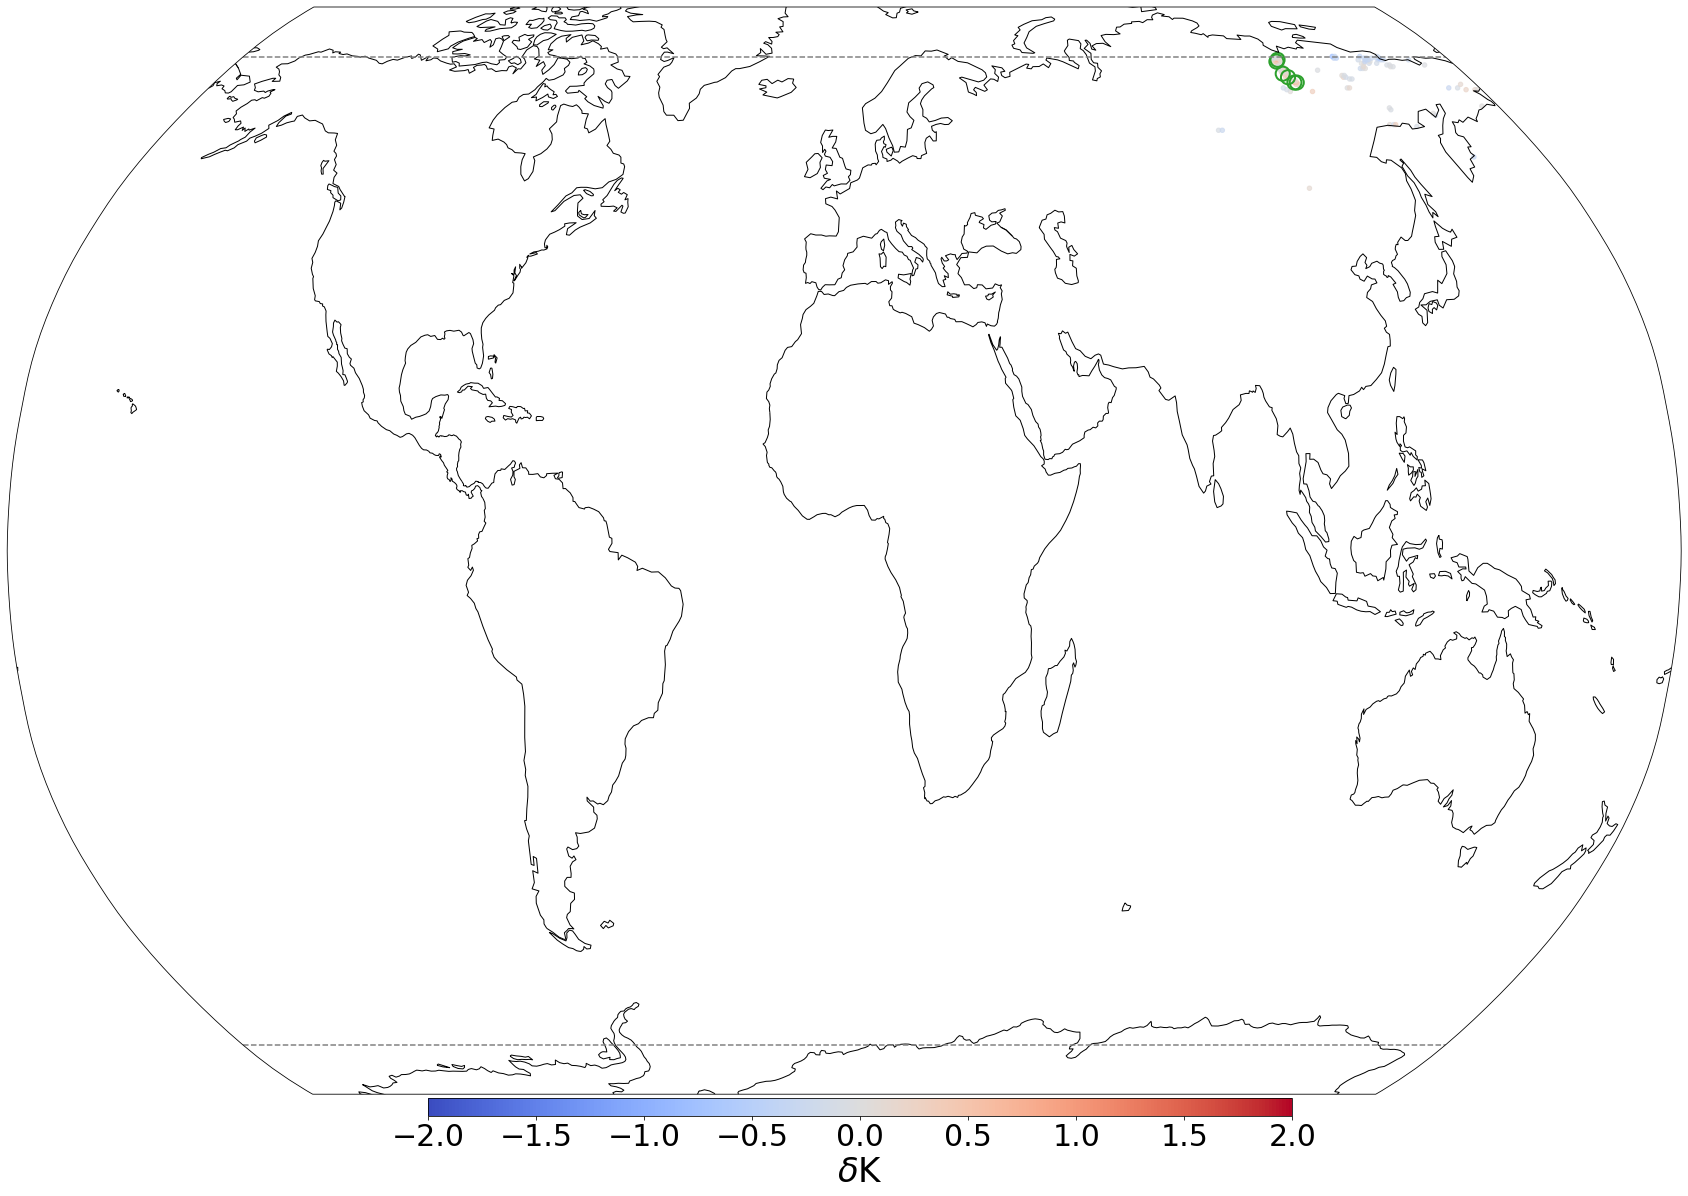

In [221]:
RobinsonPlot(df_north_lake,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_north_lake.sort_values(by=['delta'],ascending=False).iloc[3]) #[['latitude_ERA','longitude_ERA','delta']])
